# 기본 차량 조작 학습

## 1. 기본 주행

차량을 제어하기 위해서는 pop 라이브러리의 Pilot 을 불러온다.  
변수 Car라는 곳에 AutoCar() 객체를 선언하여 할당한다.

In [1]:
import time
from pop import Pilot

Car = Pilot.AutoCar()

<객체>.steering 을 통해서 바퀴 각도를 조절할 수 있다.  
  
값은 -1부터 1까지의 값으로 설정할 수 있으며 -1(왼쪽) / 0(정면) / 1(오른쪽) 순서이다.  
  
참고로 time.sleep(param) 함수는 param 값으로 숫자를 받고 입력된 숫자의 초만큼 실행을 대기한다. 

In [21]:
Car.steering = -1
time.sleep(1)
Car.steering = 1
time.sleep(1)
Car.steering = 0

차량을 이동시키는 방법으로는 <객체>.forward(param) / <객체>.backward(param) 함수를 사용하여 이동할 수 있다.  

두 함수 optional 파라미터로 속도 값을 입력 받을 수 있고 속도는 0~99 사이의 값으로 조절할 수 있다.  
  
입력하지 않고 고정된 속도를 사용하고 싶다면 <객체>.setSpeed(param) 함수를 사용하여 param으로 속도를 지정합니다.  
  
차량을 멈추기 위해서는 <객체>.stop() 으로 차량을 멈출 수 있다.

In [3]:
Car.forward(40)
time.sleep(1)

Car.backward(25)
time.sleep(1)

Car.stop()

In [4]:
Car.setSpeed(50)

Car.forward()
time.sleep(1)
Car.backward()
time.sleep(1)
Car.stop()

In [6]:
Car.forward()
time.sleep(1)
Car.stop()

간단하게 주행을 확인하기 위해서는 조이스틱을 열어서 수동으로 조작할 수 있다.

In [2]:
Car.joystick()

## 2. 램프, 소리 기타 조작

AutoCar에는 전방 후방 램프와 스피커가 내장되어 있습니다.

전후방 램프를 조작하기 위해서는 <객체>.setLamp(param1, param2)로 조작할 수 있습니다.  
param1은 앞 램프 조명이고 param2는 후방 램프 조명으로써 0은 꺼진 상태 1은 켜진 상태로 전환할 수 있습니다.

In [7]:
#파라미터 (앞 램프, 뒤 램프)
Car.setLamp(1,0)
time.sleep(1)

Car.setLamp(1,1)
time.sleep(1)

Car.setLamp(0,0)

스피커에서의 음을 출력하기 위해서는 <객체>.alarm(multi_param) 을 사용하여 음을 출력할 수 있습니다.  

multi_param에 포함된 parameter로는  
scale(음계) : 1 ~ 12 사이의 값  
pitch(음정) : 1 ~ 8 사이의 값 (도레미파솔라시도)  
duration(지속시간) : 음이 지속되는 시간으로 second 단위  
입니다.

In [8]:
# 버저에서 음 출력 (scale-음계: 1~12사이 값) / (pitch-음정: 1~8사이 값)
Car.alarm(scale=4, pitch=1, duration=0.5)
Car.alarm(scale=4, pitch=3, duration=0.5)
Car.alarm(scale=4, pitch=5, duration=0.5)
Car.alarm(scale=4, pitch=1, duration=0.5)
Car.alarm(scale=4, pitch=3, duration=0.5)
Car.alarm(scale=4, pitch=5, duration=0.5)
Car.alarm(scale=4, pitch=6, duration=0.4)
Car.alarm(scale=4, pitch=6, duration=0.4)
Car.alarm(scale=4, pitch=6, duration=0.4)
Car.alarm(scale=4, pitch=5, duration=0.5)

## 3. 센서 값 읽기 및 조정

AutoCar에는 다양한 센서들이 존재합니다.  

여기서는 cds 센서, 9축 센서, UltraSonic 센서, LiDAR 센서를 다뤄봅니다.  

우선, Cds 센서는 주변의 밝기 값을 알 수 있는 센서입니다.  

<객체>.setSensorStatus()의 함수로 센서를 활성화 할 수 있으며 cds센서를 활성화 하기 위해 cds=1을 parameter로 넣어줍니다.  
  
이후 <객체>.getLight() 함수를 통해 cds 센서로 부터 읽은 밝기 값을 알아 낼 수 있습니다.

In [9]:
# Cds 센서 값 읽기 (밝기 값 확인)
Car.setSensorStatus(cds=1)
value = Car.getLight()
print(value)

682


다음으로, 9축 센서에 대해 알아보겠습니다.  

9축 센서란 자유 공간에서 동작들을 감지할 수 있는 센서 중 가장 대중화된 센서로 가속도 3축, 관성 3축, 지자기 3축이 있습니다.  

각 3축은 x, y, z 값으로 존재하고 아래와 같은 코드로 센서 값을 입력받아 사용할 수 있습니다.

자세한 내용은 아래 링크를 참고하시기 바랍니다.

https://power-of-optimism.tistory.com/150

In [10]:
# 9축 센서의 가속도 값
value = Car.getAccel()
print(value)
time.sleep(1)

value = Car.getAccel('z')
print(value)

[-0.18, -0.11, 9.61]
9.64


In [11]:
# 9축 센서의 지자기 값
value = Car.getMagnetic()
print(value)
time.sleep(1)

value = Car.getMagnetic('z')
print(value)

[30.0, 64.75, -138.062]
-140.5


In [12]:
# 9축 센서의 자이로 값
value = Car.getGyro()
print(value)
time.sleep(1)

value = Car.getGyro('z')
print(value)

[0.0, 0.0, 0.001]
-0.001


이 외에 9축센서를 이용한 센서 값이 2가지 더 있습니다.  

첫번째로, 오일러 각 값은 물체가 놓인 방향을 3차원 공간에 표시하기 위해 오일러가 도입한 3개의 각도로  
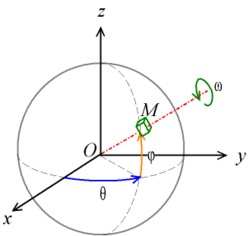
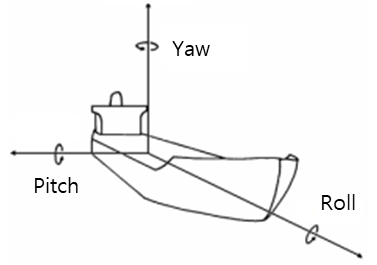
  
yaw(요), roll(롤), pitch(피치) 순서로 x축, y축, z축을 중심으로 회전한 각도를 나타냅니다.  

<객체>.setSensorStatus()와 paramerter값으로 euler=1을 넣어 오일러 센서를 활성화 한 후, <객체>.getEuler() 함수를 통해 오일러 각을 받아오면 yaw, roll, pitch순서로 값이 출력됩니다.  
  
yaw(요) : 물체가 회전하는 방향, z축을 중심으로 회전한 각도
roll(롤) : 물체가 좌 또는 우로 기우는 방향, x축을 중심으로 회전한 각도
pitch(피치) : 물체가 앞 또는 뒤로 치솟는 방향, y축을 중심으로 회전한 각도  

In [ ]:
# 오일러 각 값
Car.setSensorStatus(euler=1)
value = Car.getEuler()
print(value)
time.sleep(1)

value = Car.getEuler('yaw')
print(value)

두번째로, 9축센서에서 받고 있는 중력값을 알 수 있습니다.  

<객체>.setSensorStatus()와 parameter값으로 gravity=1을 넣어 중력값 센서를 활성화 한 후, <객체>.getGravity() 함수를 통해 x, y, z 축에 대한 중력 값을 출력할 수 있습니다.

In [14]:
# 9축 센서의 중력 값
Car.setSensorStatus(gravity=1) 
value = Car.getGravity()
print(value)
time.sleep(1)

value = Car.getGravity('z')
print(value)


[-0.16, -0.2, 9.8]
9.8


다음으로, UltraSonic 센서 즉, 초음파 센서입니다.  

초음파 센서는 10~180cm 거리를 감지하여 물체를 탐지합니다.  

<객체>.getUltraSonic() 함수를 통해 전방, 후방의 UltraSonic 센서의 값을 가져올 수 있으며 출력되는 순서는 전방, 후방의 값이 출력됩니다.  
  
값이 작을 수록 가까운 곳에 물체가 있다는 뜻으로 알고 계시면 되겠습니다.

In [15]:
# 초음파 센서 값 읽기 [전방, 후방]
Car.getUltrasonic()

[[15], [180]]

마지막으로, LiDAR 센서입니다.  

LiDAR 센서는 AutoCar() 객체에 할당되어 있지 않고 pop 라이브러리 내 LiDAR에 따로 구현되어 있습니다.  

그렇기 때문에 LiDAR를 불러와서 새로운 객체로 할당시킵니다. 이후, <객체>.connect() 함수를 통해 연결시키고  
<객체>.startMotor() 함수를 통해 LiDAR 모터를 동작시킬 수 있습니다.

In [16]:
# LiDAR
from pop import LiDAR

lidar = LiDAR.Rplidar()
lidar.connect()
lidar.startMotor()

LiDAR 센서가 읽은 값을 표현하는 방법은 3가지 방법이 존재합니다.  

첫 번째로, 0 ~ 360도 각도를 탐색하며 장애물과의 거리를 반환하는 getVectors() 함수가 있습니다.  

반환되는 값은 각도, 장애물까지의 거리, 신뢰도 순으로 반환되며 신뢰도는 0 ~ 47사이의 값입니다.

In [17]:
# 각도, 장애물까지의 거리, 신뢰도
# 거리는 mm 단위
# 신뢰도는 0~47
vectors = lidar.getVectors()

for v in vectors:
    print(v)

[ 39.76501465 796.          47.        ]
[ 40.24841309 808.          47.        ]
[ 40.74829102 818.          47.        ]
[ 41.17126465 828.          47.        ]
[ 41.67114258 842.          47.        ]
[ 42.08862305 854.          47.        ]
[ 42.58850098 864.          47.        ]
[ 43.07739258 878.          47.        ]
[ 43.51135254 890.          47.        ]
[ 43.99475098 904.          47.        ]
[ 44.4342041 918.         47.       ]
[ 44.91760254 932.          47.        ]
[ 45.35705566 948.          47.        ]
[ 45.8404541 964.         47.       ]
[ 46.34033203 982.          47.        ]
[ 46.76330566 998.          47.        ]
[  47.26318359 1016.           47.        ]
[  47.70263672 1036.           47.        ]
[  48.18603516 1056.           47.        ]
[  48.61999512 1072.           47.        ]
[  49.10888672 1094.           47.        ]
[  49.54284668 1118.           47.        ]
[  50.02624512 1142.           47.        ]
[  50.51513672 1162.           47.        

두 번째로, 장애물의 좌표를 알아내는 getXY() 함수가 존재합니다.

탐지된 모든 장애물의 좌표 값을 반환합니다.

In [18]:
# 장애물의 좌표 표현
coords = lidar.getXY()

for c in coords:
    print(c)

[  0.9386038  444.99901014]
[  4.97114576 446.97235676]
[  8.54682242 447.9184656 ]
[ 12.59617174 449.82367263]
[ 16.68647681 450.69120414]
[ 20.83944151 452.52040581]
[ 24.97171977 453.31271018]
[ 28.79129631 455.09016827]
[ 32.96353688 455.80961512]
[ 37.2321932  457.48744659]
[ 41.44365994 458.12926456]
[ 45.76877806 459.72733109]
[ 49.59531544 461.3418523 ]
[ 53.98260619 462.86269911]
[ 58.40131794 464.34177721]
[ 62.71732709 464.78762557]
[ 67.33140717 467.17286052]
[ 71.43767322 468.58580735]
[ 75.81728994 468.91016042]
[ 80.54555255 471.16495409]
[ 85.14319067 472.38822708]
[ 89.76939004 473.56673934]
[ 93.87751789 474.80839466]
[ 98.76107047 476.8807513 ]
[103.47793908 477.92605717]
[108.02791667 479.9937179 ]
[112.80594464 480.94783382]
[117.8470231 482.8261376]
[122.93106027 484.65240577]
[127.24434002 485.60568153]
[132.40200507 487.33428881]
[146.39230391 486.44968225]
[153.31128765 494.79253135]
[158.37326756 495.29577842]
[163.51034671 497.83568225]
[169.27257742 500.1307

마지막으로, 탐지된 장애물을 표시하는 맵을 그릴 수 있습니다.  

pop 라이브러리 내 Util을 불러와서 jupyter notebook내에서 그려진 맵을 볼 수 있습니다.  

getMap(multi_parameter) 함수를 이용하여 맵을 그릴 수 있으며 parameter로는  
limit_distance : LiDAR 센서가 탐지할 최대거리 지정
size : 해상도 설정  
이 존재합니다.

In [19]:
from pop import Util

lidar_map = lidar.getMap(limit_distance=2000, size=(300, 300))
Util.imshow("map", lidar_map)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

In [20]:
lidar_map = lidar.getMap(limit_distance=2000, size=(50, 50))
Util.imshow("map2", lidar_map)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

LiDAR의 사용을 중지하기 위해서는 stopMotor() 함수를 사용하여 동작을 중지할 수 있고, destroy() 함수를 사용해 연결을 해제시킬 수 있습니다.

In [21]:
lidar.stopMotor()
lidar.destroy()